## Logistic Regression

In [62]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print("X:", X)
print("y:", y)

X: [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y: [0 0 0 0 1 1 1 1 1 1]


In [6]:
model = LogisticRegression(solver="liblinear", random_state=1)

model.fit(X,y)

prediction = model.predict(X)

In [8]:
print("list of classes :", model.classes_)

list of classes : [0 1]


In [9]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: [-1.04608067]
Coefficient: [[0.51491375]]


In [10]:
print("label:", y, sep="\n")
print("prediction:", prediction, sep="\n")

label:
[0 0 0 0 1 1 1 1 1 1]
prediction:
[0 0 0 1 1 1 1 1 1 1]


In [11]:
model.predict_proba(X)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [13]:
(1*model.coef_ + model.intercept_)

array([[-0.53116692]])

In [14]:
auc_score = model.score(X, y)
print("acuracy score:", auc_score)

acuracy score: 0.9


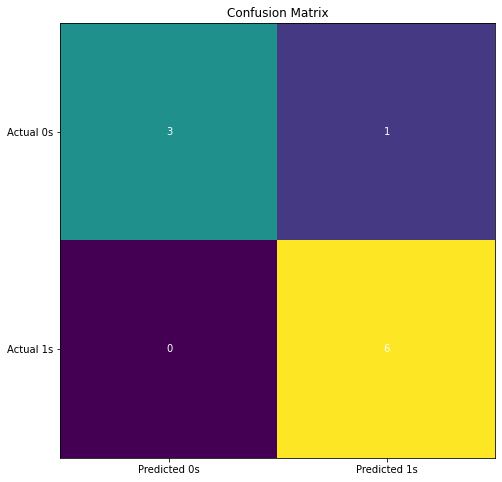

In [21]:
confusion = confusion_matrix(y, prediction)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion[i, j], ha="center", va="center", color="white")
plt.title("Confusion Matrix")
plt.show()

In [18]:
print(classification_report(y, prediction, target_names=["Not Spam", "Spam"]))

              precision    recall  f1-score   support

    Not Spam       1.00      0.75      0.86         4
        Spam       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



## Handwriting Recognition

In [25]:
X, y = load_digits(return_X_y=True)

In [26]:
print("dataset shapes:", X.shape)
print("target shapes:", y.shape)

dataset shapes: (1797, 64)
target shapes: (1797,)


In [28]:
print("sample image:")
print(X[0])

sample image:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [35]:
images = X.reshape(-1, 8, 8)
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<function matplotlib.pyplot.show(close=None, block=None)>

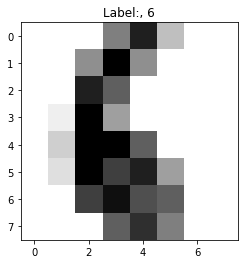

In [37]:
sample = np.random.randint(len(images))

plt.imshow(images[sample], cmap=plt.cm.gray_r)
plt.title(f"Label:, {y[sample]}")
plt.show

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=2, random_state=111)
print(f"Training with: {len(X_train)}.. Validating with: {len(X_valid)}")

Training with: 1795.. Validating with: 2


In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_valid = scaler.transform(X_valid)

In [47]:
X_train[0], scaled_X_train[0], X_valid[0], scaled_X_valid[0]

(array([ 0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  7., 16.,  9., 14.,
         7.,  0.,  0.,  0., 10.,  9.,  0., 14.,  5.,  0.,  0.,  0.,  3.,
         3.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 15.,
         8.,  8.,  3.,  0.,  0.,  0., 10., 16., 16., 16.,  9.,  0.]),
 array([ 0.        , -0.33522404,  0.37683289,  0.98041556,  0.96909521,
        -0.49095223, -0.40912917, -0.12509364, -0.05911058,  1.5655009 ,
         1.03564579, -0.74871739,  0.77879035, -0.19402723, -0.51468582,
        -0.13050726, -0.04464998,  2.06796499, -0.16087432, -1.20586448,
         1.11852087, -0.45261861, -0.54836734, -0.11428629, -0.03339834,
         0.16768011, -0.98526302, -0.81906557,  0.98767707, -0.94486019,
        -0.628531  , -0.04725875,  0.        , -0.67291625, -1.21205661,
         0.4681848 ,  0.11880051, -1.48884252, -0.82260041,  0.        ,
        -0.06137796, -0.53166361, -0.13523726,  1.3626

In [56]:
model = LogisticRegression(solver='liblinear', c=.05, multi_class='ovr', random_state=1)

model.fit(scaled_X_train, y_train)


TypeError: __init__() got an unexpected keyword argument 'c'

In [61]:
sample = np.random.randint(len(images))
prediction = model.predict(scaler.transform(X[sample].reshape(1, -1)))
plt.imshow(images[sample], cmap=plt.cm.gray_r)
plt.title(f"Label:, {y[sample]}..Prediction: {prediction[0]}")
plt.show

ValueError: X has 64 features per sample; expecting 1

# KNN

In [63]:
wine = load_wine()

In [67]:
feature_names = wine.feature_names
target_names = wine.target_names

print(feature_names)
print(target_names)

print(wine.data.shape)
print(wine.target.shape)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
(178, 13)
(178,)


In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=1)
print(f"Training with: {len(X_train)}.. Validating with: {len(X_valid)}")

Training with: 1257.. Validating with: 540


In [70]:
X_train[0], X_valid[0]

(array([ 0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  7., 16.,  9., 14.,
         7.,  0.,  0.,  0., 10.,  9.,  0., 14.,  5.,  0.,  0.,  0.,  3.,
         3.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,
         0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 15.,
         8.,  8.,  3.,  0.,  0.,  0., 10., 16., 16., 16.,  9.,  0.]),
 array([ 0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  4., 12., 11.,
        14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,
         2.,  8., 10., 16.,  9.,  0.,  0.,  0.,  7., 13., 16., 14.,  5.,
         0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10.,
        15.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.]))

In [79]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

train_pred = model.predict(X_train)
valid_pred = model.predict(X_valid)

print("Classificaiton:", 
      classification_report(y_train, train_pred, target_names=target_names), 
      sep="\n")
print("Classificaiton:", classification_report(y_valid, valid_pred, target_names=target_names), sep="\n")

ValueError: Number of classes, 10, does not match size of target_names, 3. Try specifying the labels parameter

In [ ]:
k = 1
model = KNeighborsClassifier()